# Cover Type Machine Learning Project



## Background

This project will cover all aspects of the Data Analytics with Python unit.  To complete the project, follow the instructions at each step in the notebook and add Python code or written explanations as instructed.   Some tasks below will require you to answer with a written response rather than writing code.  Those tasks begin with the words "Explain" or "Write".


## Objective
For this project you will utilize Numpy, Pandas, Matplotlib, Seaborn and Sklearn to create a Supervised Machine learning model that can assist natural resouce managers predict tree cover in neighboring lands.


## Data Introducution

To complete this project you will need to retrieve the "Cover Type Dataset" available at the UC Irvine Machine Learning Repository. You can find information about the dataset as well as the data [here](https://archive.ics.uci.edu/ml/datasets/Covertype).  To download the data, click the link at the top that reads **Data Folder**.  On the resulting page you will find three files for download.  Please download the file named `covtype.data.gz`, and use your preferred decompression utility to uncompress the file.  

Before you can begin with this project, you must familarize yourself with the data.  Please read the `convtype.info` file that is also available for download.  You can either download the file and open with your favorite text editor or [view it in the web browser](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).

In Summary:

> Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  **One method of obtaining this information is through the use of predictive models.**  

> [The purpose of this dataset is for] predicting forest cover type from cartographic variables... The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data... Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 



Here are some hints to help explain some of the data columns:

- Slope:  The angle in degrees of the slope on which the forest cover is growing.  
- Aspect:  The direction the slope is facing in degrees azimuth:  North = 0, East = 90, South = 180, West = 270.
- The columns representing shade contain values from 0 to 255 with 0 meaning no sun and 255 meaning full sun.
- There are 40 columns representing differnet soil types.  See the `convtype.info` file for a listing of these types.  The observations in these 40 columns indicate if cover was: absent = 0, present = 1
- There are 4 columns representing 4 different wilderness areas. The observations in these 4 columns indicate if cover was:  absent = 0, present = 1



---
## 1. Setup the Notebook
**1a.** Load all the necessary packages and libraries required for the entire notebook using the following (5 pts).

In [546]:
%matplotlib inline
import os
# Data Management
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

---
## 2. Import the data
**2a.** First, import the data. Note, it does not have any headers. This is a large dataset so it may  take a minute to load (3 pts).

In [547]:
os.chdir('C:\\Users\Joshu\OneDrive\Desktop\AFS\Project2')
print("Current Working Directory " , os.getcwd())
covtype = pd.read_csv('covtype1.data.gz', delimiter=",", encoding='utf-8', header=None, error_bad_lines=False)

Current Working Directory  C:\Users\Joshu\OneDrive\Desktop\AFS\Project2


**2b.** Display the first 10 lines of the data (3 pts).

In [548]:
covtype.head(10)

0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   
5  2579  132   6  300  -15    67  230  237  140  6031  ...   0   0   0   0   
6  2606   45   7  270    5   633  222  225  138  6256  ...   0   0   0   0   
7  2605   49   4  234    7   573  222  230  144  6228  ...   0   0   0   0   
8  2617   45   9  240   56   666  223  221  133  6244  ...   0   0   0   0   
9  2612   59  10  247   11   636  228  219  124  6230  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  
5   0   0   0   0   0   2  
6   0   0   0   0   0   5  
7   0   0   0   0   0   5  
8   0   0   0   0   0   5  
9   0   0   0   0   0   5  

[10 rows x 55 columns]

**2c.** Add appropriate headers to the data frame, using the following array:(3 pts)

In [549]:
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'

]
covtype.columns = headers


**2d.** Display the first 10 lines of data again to confirm the headers are present (3 pts).

In [550]:
covtype.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ...  ST32  ST33  ST34  ST35  ST36  \
0                                6279  ...     0     0     0     0     0   
1                                6225  ...     0     0     0     0     0   
2                                6121  ...     0     0     0     0     0   
3                                6211  ...     0     0     0     0     0   
4                                6172  ...     0     0     0     0     0   
5                                6031  ...     0     0     0     0     0   
6                                6256  ...     0     0     0     0     0   
7                                6228  ...     0     0     0     0     0   
8                                6244  ...     0     0     0     0     0   
9                                6230  ...     0     0     0     0     0   

   ST37  ST38  ST39  ST40  Cover_Type  
0     0     0     0     0           5  
1     0     0     0     0           5  
2     0     0     0     0           2  
3     0     0     0     0           2  
4     0     0     0     0           5  
5     0     0     0     0           2  
6     0     0     0     0           5  
7     0     0     0     0           5  
8     0     0     0     0           5  
9     0     0     0     0           5  

[10 rows x 55 columns]

---
## 3. Explore the Data
**3a.** Show the dimensions of the data (3 pts).

In [551]:
covtype.shape
covtype.ndim

2

**3b.** Show the datatypes of all of the columns in the data (3 pts).

In [552]:
covtype.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Rawah                                 int64
Neota                                 int64
Comanche_Peak                         int64
Cache_la_Poudre                       int64
ST1                                   int64
ST2                                   int64
ST3                                   int64
ST4                                   int64
ST5                                   int64
ST6                                   int64
ST7                                   int64
ST8                                   int64
ST9                             

**3c.** Show if the dataset has any missing values (3 pts).

In [553]:
covtype.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Rawah                                 0
Neota                                 0
Comanche_Peak                         0
Cache_la_Poudre                       0
ST1                                   0
ST2                                   0
ST3                                   0
ST4                                   0
ST5                                   0
ST6                                   0
ST7                                   0
ST8                                   0
ST9                                   0
ST10                                  0
ST11                                  0


**3d.** Show how many rows of data are duplicated (3 pts).

In [554]:
covtype.duplicated().sum()

0

**3e.** Show how many unique values there are per column (3 pts).

In [555]:
covtype.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Rawah                                    2
Neota                                    2
Comanche_Peak                            2
Cache_la_Poudre                          2
ST1                                      2
ST2                                      2
ST3                                      2
ST4                                      2
ST5                                      2
ST6                                      2
ST7                                      2
ST8                                      2
ST9                                      2
ST10       

---
## 4. Clean the Data
### 4.1. Missing Values
**4a.** If the dataset had missing values, determine if you need to clean the data. If so, show the code below. If you do not perform any cleaning indicate why (change the cell to "raw" type to write your explanation)  (3 pts).

I will not have to worry about dealing with missing values because their are none. However Since the data is so large, I should be worried about inaccurate or un necessary values. I.e : if a row is filled with 0's or 1's which incorrectly described the data. I will not be cleaning the data at this point. 

### 4.2 Duplicated Data
**4b.** If the dataset had duplicated values, determine if you need to clean the data. If so, show the code below. If not, describe the status of duplicated data in this dataset (change the cell to "raw" type to write your explanation)  (3 pts).

There are no duplicates in the data so I will not need to do anything to clean the data of duplicates.

**5b.** Explain if the unique number of values or each of the categorical columns (non numeric and non binary) match what is expected based on the description of the data  (3 pts).

Yes the unique values per column does match what I expected. None of the column values seem to be larger then what I would expect for them to be. That values for the distances are are realistic expectations. 

### 4.3 Fix Categorical Data
Some of the columns are categorical (i.e. qualitative).  Remember, just becauase a column contains numbers does not mean it is quantitative. In the online description of the data, the authors stated that the soil types and wilderness areas are qualitative (categorical). You must decide if this is true given the dataset.

**4c.** Write the names of the columns that are categorical (3 pts).

**4e.** Change all categorical columns that were imported as a numeric type to a string type  (3 pts).

In [556]:
#pd.DataFrame(covtype)
covtype[['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40','Cover_Type']] = covtype[['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
       'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40','Cover_Type']].astype(str)

**4d.** Confirm that all categorical columns are no longer numeric (3 pts).

In [557]:
covtype.dtypes
covtype['Cover_Type'].value_counts(ascending = False)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

**4e.** The `Cover_Type` column is a string but appears numeric, and each number represents a unique class of trees. Convert the numeric values to their corresponding string representations. Print the top 10 entries to confirm your replacement worked (5 pts).

In [559]:
covtype['Cover_Type'] = covtype['Cover_Type'].replace(['1','2','3','4','5','6','7'], ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'])
covtype.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ... ST32 ST33 ST34 ST35 ST36 ST37 ST38  \
0                                6279  ...    0    0    0    0    0    0    0   
1                                6225  ...    0    0    0    0    0    0    0   
2                                6121  ...    0    0    0    0    0    0    0   
3                                6211  ...    0    0    0    0    0    0    0   
4                                6172  ...    0    0    0    0    0    0    0   

  ST39 ST40      Cover_Type  
0    0    0           Aspen  
1    0    0           Aspen  
2    0    0  Lodgepole Pine  
3    0    0  Lodgepole Pine  
4    0    0           Aspen  

[5 rows x 55 columns]

### 4.4 Subset the Data
The dataset is a bit large for this notebook. It will consume too much RAM on your computer.  If we were executing this on a computer with more RAM we might just write a Python script to do the work rather than use a Jupyter notebook.  To reduce the dataset we should subset our data to save resources. 

**4f.** Before we subset the data, let's explore the number of samples per cover type.  For the `Cover_type` column, show the counts of each type of cover, and sort the results from largest to smallest (5 pts).

In [560]:
covtype1 = pd.DataFrame(covtype)
covtype1 = covtype['Cover_Type'].value_counts(ascending = False) 
covtype1.head()

Lodgepole Pine    283301
Spruce/Fir        211840
Ponderosa Pine     35754
Krummholz          20510
Douglas-fir        17367
Name: Cover_Type, dtype: int64

**4g.**  The results of the previous cell show that the number of measurements per cover type is imbalanced with the smallest having 2,747 observations and the largest 283,301.  Let's subset the data to only include 2,000 randomly selected samples from each cover type.   We have not covered in class how to do this, so below is a code sample you can use. 
```python
df = df.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
```
Notice in the line of code above, we first perform a `groupby` operation to organize rows by their cover type. Next, we  call `apply` on each group. With the `apply` function you must provide the name of the function that will be called for each group. In this case, the word `lambda` tells python that we are declaring an "anonymous" in-line function (no `def` line) that takes an argument `x`.  As the apply is executed on each group, the variable `x` contains the data for each group, and is actually a Pandas DataFrame. Hence, we can call `sample` to select 2000 random rows.  The `apply` function returns a new DataFrame containing all selected rows from all groups.  On this data frame we call `reset_index` to renumber the index for all of our rows.

(3 pts)

In [561]:
df = covtype.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)

**4h.** Re-run the same command from task 4f. The results should show an even 2,000 samples of each cover type (3 pts).

In [562]:
df1 = df['Cover_Type'].value_counts(ascending = False) 
df1.head()

Cottonwood/Willow    2000
Krummholz            2000
Lodgepole Pine       2000
Ponderosa Pine       2000
Aspen                2000
Name: Cover_Type, dtype: int64

### 4.5 Tidy or not to Tidy?

You'll notice that this dataset is not tidy!  We have a variable in the headers:  the different soil types.  To tidy this data we would normally melt the soil types into a single column, perhaps named `Soil_Type`. We could then remove all rows where the soil type was not present (i.e. has a value of 0) and drop the melted values column with the absent/present binary value.  

However, as we've learned in class, the Sklearn package which we will use for machine learning cannot handle strings for categorical data.  It wants categorical data reset as numeric values: one for each category. But this only works for ordinal data.  Our soil type data is not ordinal.  If we melted our dataframe, then for machine learning we would need to perform ["One Hot Encoding"](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) to put the `Soil_Type` column dataframe into a format that Sklearn approves of. The end result is a pivot of the dataframe back to what it currently is!  So, even though we should Tidy this dataset, let's leave it as is for Sklearn.

---
## 5. Understand the data
### 5.1  Review Categorical Data

**5a.** Generate a dataframe that contains the number of times we see a soil type present for each cover type.  Show the top 10 rows of the dataframe.

For example:

<table>
    <tr><th></th><th>Cover_Type</th><th>Soil_Type</th><th>Present</th></tr>
    <tr><th>0</th><th>Aspen</th><th>ST02</th><th>53</th></tr>
    <tr><th>1</th><th>Aspen</th><th>ST04</th><th>117</th></tr>
    <tr><th>2</th><th>Aspen</th><th>ST10</th><th>64</th></tr>
    <tr><th>3</th><th>Aspen</th><th>ST11</th><th>148</th></tr>
    <tr><th>4</th><th>Aspen</th><th>ST13</th><th>319</th></tr>
</table>

Hint:
- Start with a reduced dataframe that only contains the 40 soil types + `Cover_Type`
- Melt the data.
- Exclude soil types that are absent.
- Use a `groupby`.

(5 pts)

In [563]:
# Used the full data set rather then the 2000k sample set
covtype[['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40']] = covtype[[ 
       'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40']].astype(int)

qual_df = covtype.iloc[:,14:]

qual_melt = qual_df.melt(id_vars = 'Cover_Type', var_name = 'Soil_Type', value_name = 'Present')

qual_melt1 = qual_melt[qual_melt['Present'] != 0]

qual_melt1 = qual_melt1.groupby(['Cover_Type', 'Soil_Type'], as_index = False).sum()

qual_melt1.head(10)

Cover_Type Soil_Type  Present
0      Aspen      ST10      260
1      Aspen      ST11      681
2      Aspen      ST13     1315
3      Aspen      ST16       35
4      Aspen      ST17      600
5      Aspen      ST18      170
6      Aspen      ST19       67
7      Aspen       ST2      264
8      Aspen      ST20       53
9      Aspen      ST23      699

**5b.** Using the dataframe just created, draw a plot showing the relationship between the cover type and the soil type. Size the points in the plot by the counts. Ensure that the axis ticks and legend are legible. Save the figure to a file named `covtype-soil_type.scatter.png` for viewing (5 pts). 

[Text(0.5, 1.0, 'Scatter Plot of the soil occurances in each cover type')]

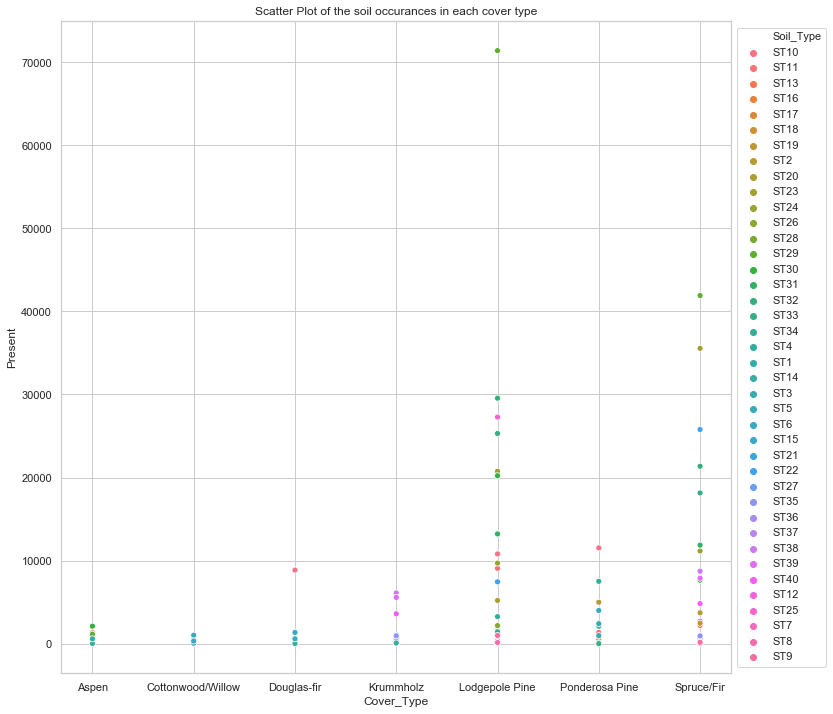

In [564]:
qual_melt1[qual_melt1['Present']==qual_melt1['Present'].max()]
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x = 'Cover_Type', y = 'Present', hue= 'Soil_Type', data = qual_melt1);
ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
ax.set(title = "Scatter Plot of the soil occurances in each cover type")

#plt.savefig('C:\\Users\Joshu\OneDrive\Desktop\AFS\project2\covtype-soil_type.scatter.png')

**5c.** Explain why it is important to review the scatterplot of "Cover_Type" vs. all the soil types (3 pts).

It is important to review Cover_Type vs all of the soil types so we can speculate if there are relationships between the types of cover and types of soil. If there isn't, then we shouldn't include it in our analysis in section 6. As we can see only a few times is soil present in Cottonwood/Willow and the times it present the circles are blue. This means that ST14 - ST22 could be good indicators if the cover type is Cottonwood/Willow and tells us we should keep those soil types.

### 5.2 Review the quantitative data
**5d.** Show the basic summary statistics for the quantitiatve data, excluding the 40 binary soil type columns (3 pts).

In [565]:
quan_reduced = df.iloc[:,0:10]

quan_reduced.dtypes
quan_reduced.shape
quan_reduced.describe()

Elevation        Aspect         Slope  \
count  14000.000000  14000.000000  14000.000000   
mean    2749.546857    156.072143     16.520929   
std      418.598999    109.926628      8.542586   
min     1859.000000      0.000000      0.000000   
25%     2378.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3110.000000    259.000000     22.000000   
max     3851.000000    360.000000     57.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      14000.000000                    14000.000000   
mean                         229.645357                       51.316429   
std                          208.838576                       60.986435   
min                            0.000000                     -132.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       33.000000   
75%                          335.000000                       81.000000   
max                         1293.000000                      501.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     14000.000000   14000.000000    14000.000000   
mean                       1717.226000     212.882214      219.006286   
std                        1325.208349      30.406998       22.862346   
min                           0.000000      64.000000       85.000000   
25%                         759.000000     196.000000      207.000000   
50%                        1318.000000     220.000000      223.000000   
75%                        2291.250000     235.000000      235.000000   
max                        6841.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   14000.000000                        14000.000000  
mean      134.831643                         1519.147429  
std        45.862968                         1096.302837  
min         0.000000                            0.000000  
25%       107.000000                          741.000000  
50%       138.000000                         1266.000000  
75%       167.000000                         2012.500000  
max       247.000000                         6901.000000

**5e.** Use the [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of Pandas Dataframes to create a single figure showing the histograms of every quantitative data column excluding the 40 binary soil type columns.  Size the figure to ensure all text is legible. Save the figure to a file named `covtype.histograms.png` for viewing. 

Hint:
- Because you will use the `DataFrame.hist` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.

(5 pts)

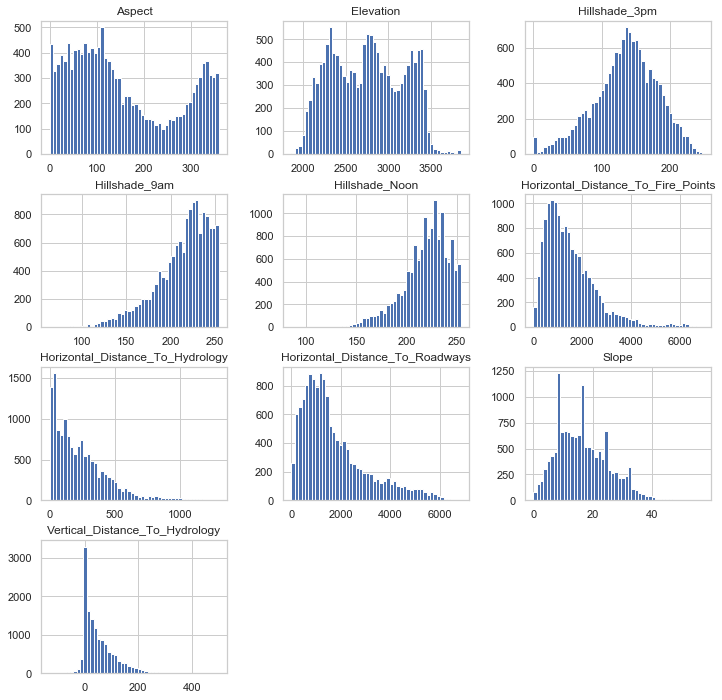

In [566]:
quan_reduced.hist(figsize = (12,12), bins = 50);

#plt.savefig('C:\\Users\Joshu\OneDrive\Desktop\AFS\Project2\covtype.histograms.png')

**5f.** Explain why it is important to examine the histogram of each quantitative column (3 pts).

It is important to examine each histogram for 2 main reasons. 

1) To check for outliers. Some models in machine learning require that there are no outliers.

2) To check how the data is distributed. Some models in statisics require parametric data (normally distbuted). 

You should always have a basic understanding of how your data is visualized before you begin modeling your data.

**5g.** Use the Seaborn [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to gererate a scatterplot of every quantitative column (excluding the 40 binary soil type columns) with every other quantitative column.  Use `Cover_Type` as the `hue` argument, use `"kde"` as the `diag_kind` argument, and use `5` as the `height` argument.  Because each scatterplot will be small we need to limit the size and number of points. Otherwise, the points overlap which and will hide the color of those behind.  Include only 1000 randomly selected rows from the dataset.  To further improve the plot we can set the size of the point size using the `plot_kws` argument.  Set it using the dictionary: `{"s": 15}`.

Hint: 
- Use the `qual_cols` argument to only include the list of columns you want to plot.
- Use the `sample` function to limit the number of points.

The plot will be huge! You can view it in the notebook but it will be difficult to read the labels. Therefore, save the figure to a file named `covtype.pairplot.png` for viewing. It will take a few minutes to display the plot.

(5 pts)

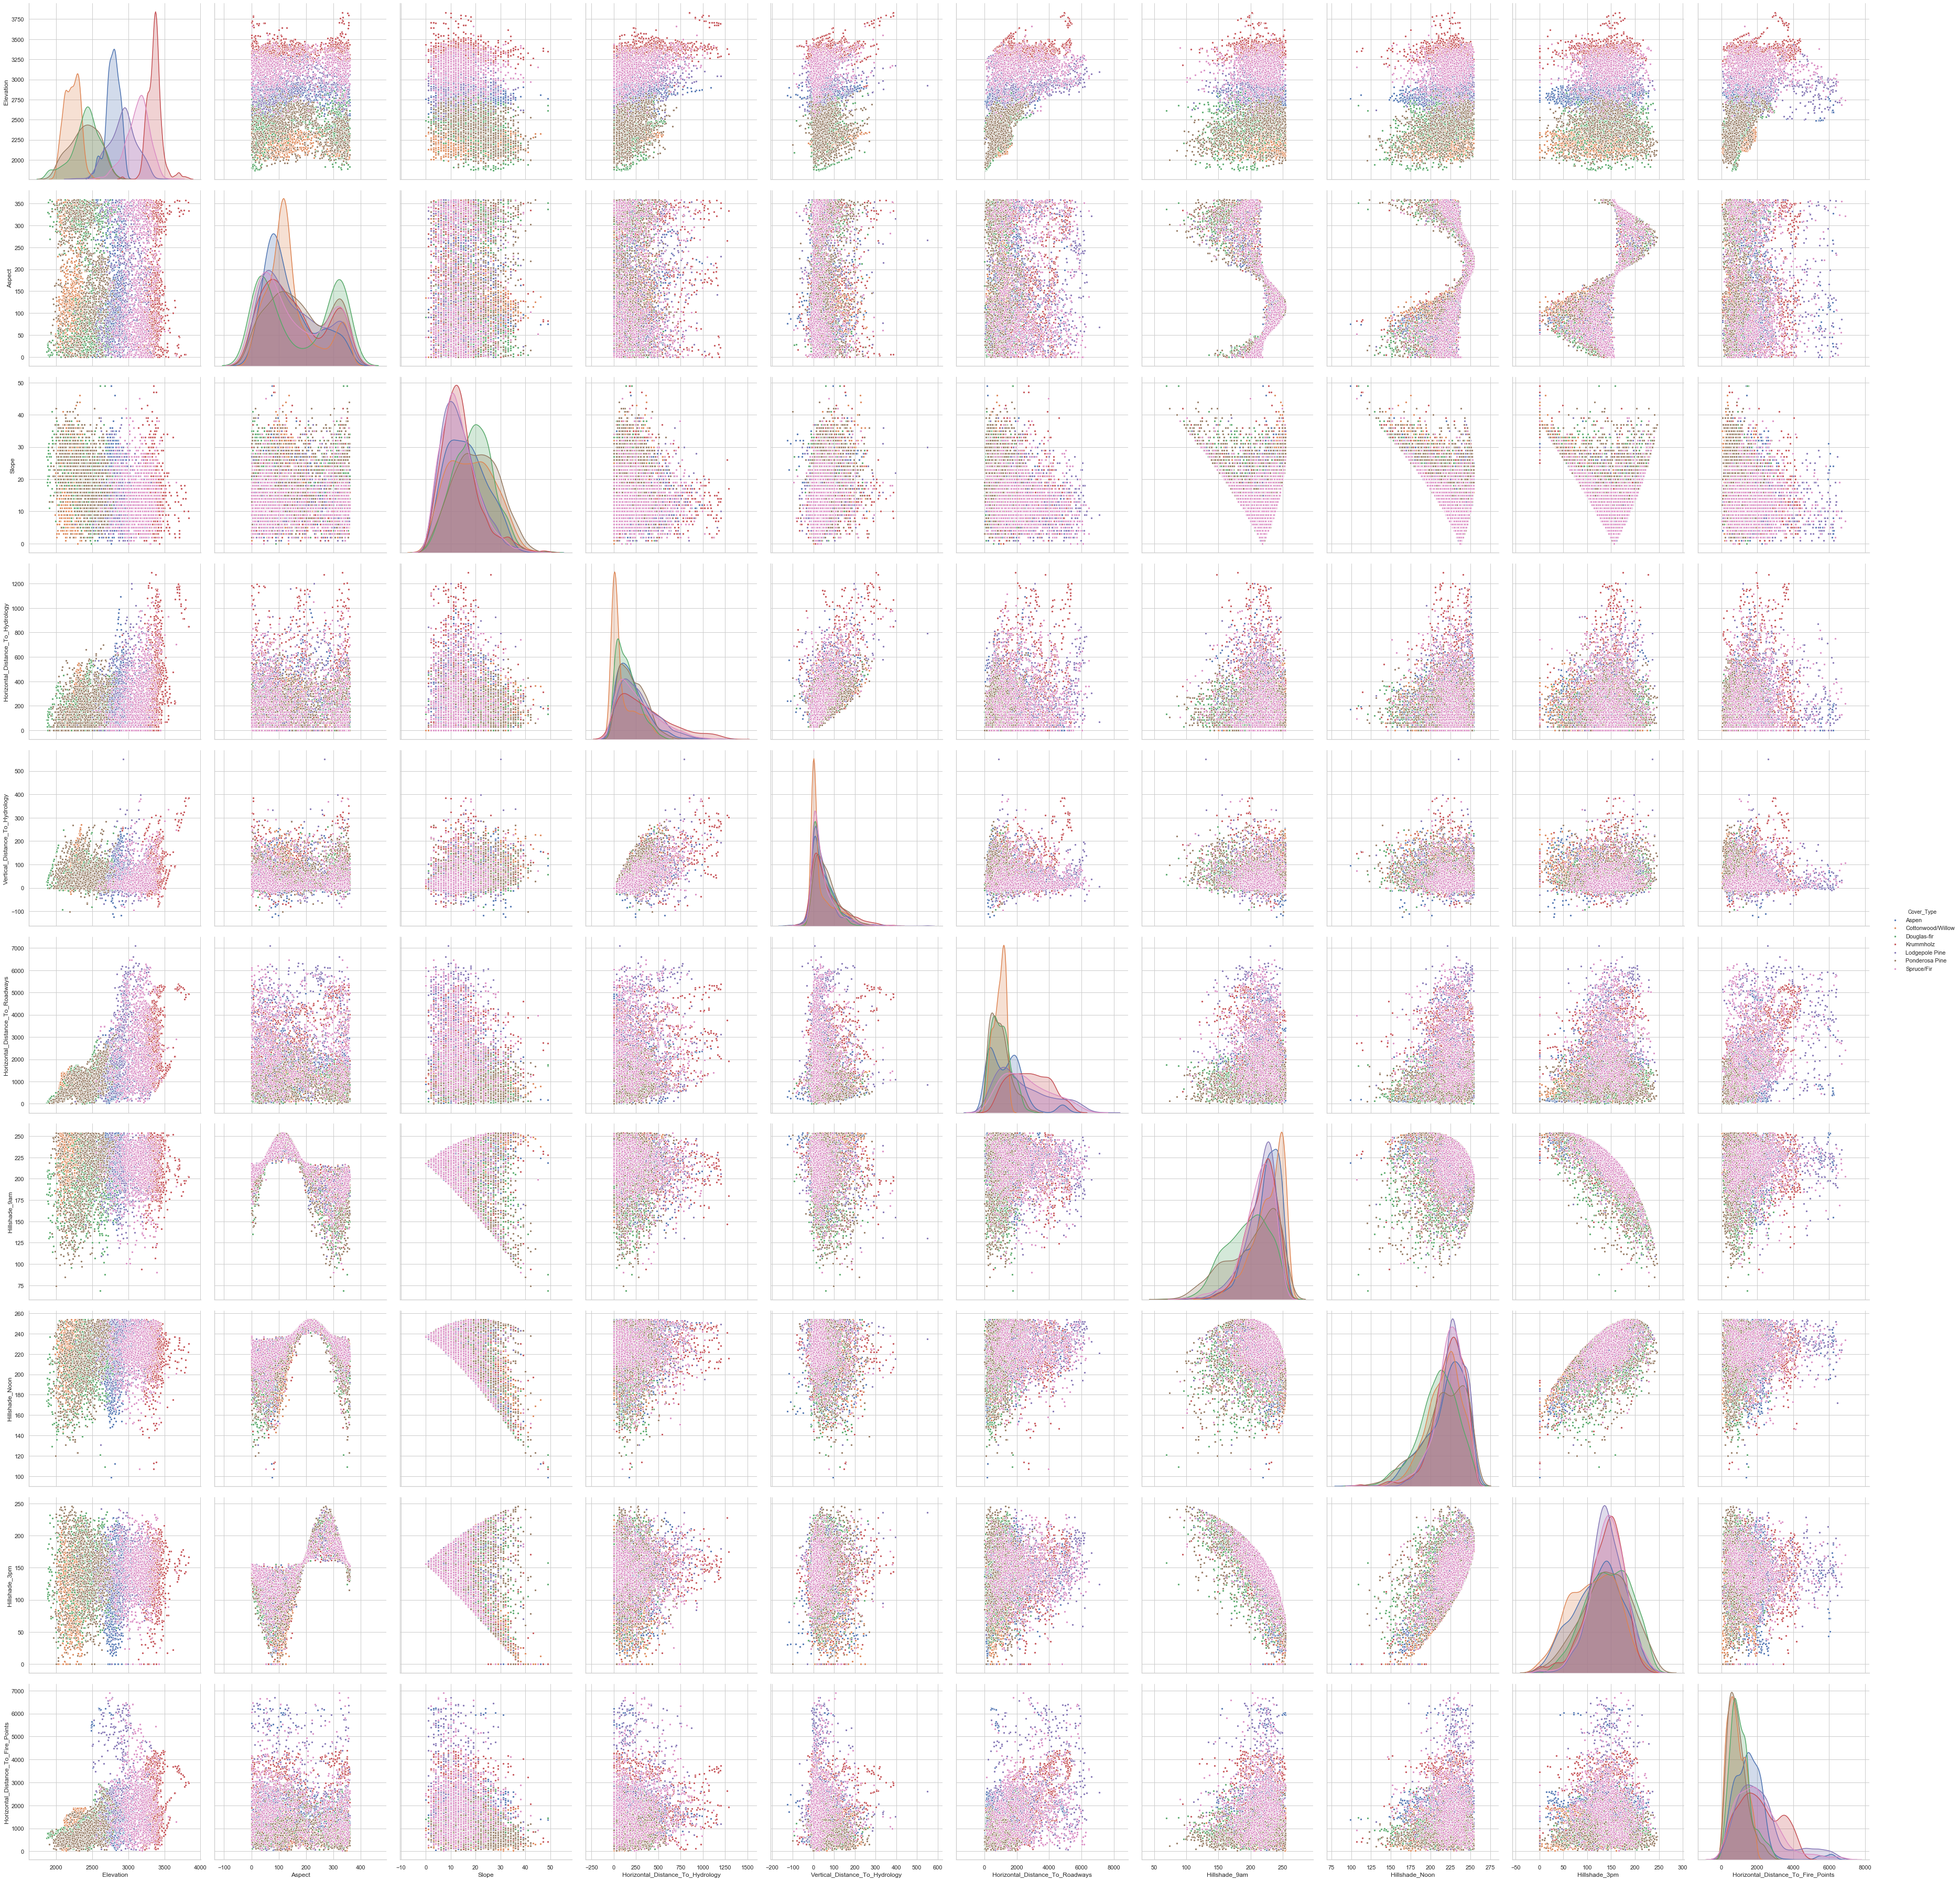

In [519]:
quan_cov = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,-1]]

quan_1k = quan_cov.groupby(by="Cover_Type").apply(lambda x : x.sample(1000)).reset_index(drop=True)

plot1 = sns.pairplot(quan_1k, hue="Cover_Type", height = 5, diag_kind = "kde", plot_kws = {"s" : 15});

#plt.savefig('C:\\Users\Joshu\OneDrive\Desktop\AFS\project2\covtype.pairplot.png')

**5h.** Explain why it is important to examine the pairwise scatterplots of all quantitative columns  (3 pts).

**5i.** Create 10 figures such that each figure corresponds to a single quantitative column in the data.  Each figure should contain 7 boxplots, one for each cover type, and should have a title indicating the quantitative column it describes. Save each figure using the naming scheme: `covtype-{column_name}.boxplot.png`. Replace the tag `{column_name}` with the name of the column represented by the figure.  Exclude outliers from the plots.

Hints: 
1. First, group the dataframe by `Cover_type`
2. Second, loop over all the names of quantitative columns.
3. Third, you can create a boxplot using the dataframe summary statistics:
   ```python
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.
   df.describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90);
   ```
4. Because you will use the `DataFrame.plot` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function to save each plot. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.
5. Do not limit the numer of rows as in the pairplot.

(8 pts)

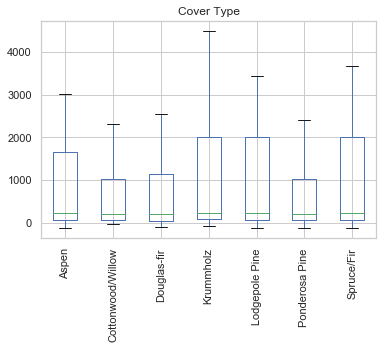

In [567]:
quan = df.loc[:,['Cover_Type', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']]
covtype['Cover_Type'] = covtype['Cover_Type'].replace(['1','2','3','4','5','6','7'], ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'])

quan = quan.groupby(['Cover_Type'])

quan.describe().transpose().plot(kind="box", title='Cover Type', showfliers=False, rot=90)


# only plots 1 variable. I need 10 of these!

**5j.** Explain why it is important to review the distribution of the "Cover_Type" column with every other quantitative data column (3 pts).

It is important because Cover_Type is the variable that we are trying to predict. Therefore this variable should be examined as much, or even more then the independent variables.

Since our quantitative data along with our qualitative data helps predict cover type, we should examine the relationships between the dependent and indepent variables before attempting to make any predictions.

### 5.3 Check for outliers

**5k.** Identify if any quantitative columns have outliers. Do this by generating a **single** figure containing one boxplot for each quantitative column (excluding the 40 binary soil type columns). Save the figure as `covtype-outlier_check.png`. Unlike the previous 10 figures you do not need to create separate boxplots by cover type (5 pts).

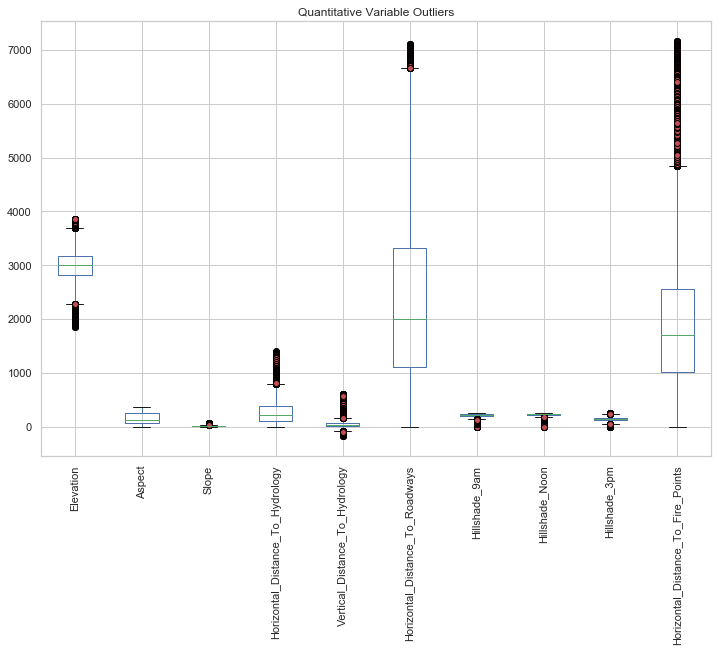

In [568]:
red_outliers = dict(markerfacecolor='r', marker='o')
sns.set_style('whitegrid')
quan_full = covtype[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type']]

quan_full.plot(kind = 'box', subplots = False, showfliers=True, title='Quantitative Variable Outliers', rot=90, figsize = (12, 8),  flierprops=red_outliers);

#plt.savefig('C:\\Users\Joshu\OneDrive\Desktop\AFS\project2\covtype-outlier_check.png')

**5l.** Explain why it is important to look for outliers prior to using machine learning techniques (3 pts).

Because outliers can severly negativly impact your results.
With outliers, the data can become skewed, have a lower RMSE, experimental errors, data processing errors, sampling errors.
Isolation forest models do not allow for outliers.

---
## 6. Make assumptions

**6a.** Explain which columns of data would be poor predictors of cover type. Justify your answer by referring to the plots from Section 5 (3 pts).

##### Aspect
The variable Aspect tells us the direction the slope variable is faceing in degrees. Despite having litte forestry knowledge, I don't think it should matter which direction in degrees a tree is growing at. I do think the slope is important because some trees can grow better on hills then others.

##### Aspect, Hillshade_9am, Hillshade_Noon, and Hillshade_3pm's
Aspect, Hillshade_9am, Hillshade_Noon, and Hillshade_3pm's observations have very similar observational values. For example, all of their mean values shown in the descriptive table range between 130 - 219 which is relativly close in value compared to the other variables. If all variables are used in the model it may bring multicollinearoty into the model. 

##### Dummy variables
If a certain area has no shade at 9am, and at noon its shade has decreased by about 50%, then we can conclude that it will have shade a 3pm. This is similar to the dummy variable trap in that we should drop k-1 dummy variables to avoid perfect multicollinearity. 

But since I am unfamiliar with forestry, I will only drop aspect for this my machine learning models.



**6b.** Write which columns you expect can contribute to prediction of cover type? (3 pts).

---
## 7. Perform Supervised Machine Learning
### 7.1 Prepare the Data

**7a.** Create a subset of the original data that contains only the columns you indicated in task 6b and the `Cover_Type` column.  Print the list of remaining columns to verify the dataframe has the columns you want to keep:

Hint:
- Drop all column from the dataset not deemed predictive.

(3 pts)

In [569]:
### Using a subset of the full data frame that contains 2000 of each cover type
### which gives us 14,000 observations

ML = df.loc[:,['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah', 'Neota', 'Comanche_Peak',
       'Cache_la_Poudre', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']]

ML.head()
ML.shape

(14000, 54)

**7b.** For machine learning we need to separate the column containing our dependent variable `Cover_Type` from the independent variables.  Create a Numpy array containing the dependent variable `Cover_Type`. Name it `Y` (3 pts).

In [570]:
Y = ML['Cover_Type'].to_numpy()
print(type(Y))
Y[0:10]

<class 'numpy.ndarray'>


array(['Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen',
       'Aspen', 'Aspen', 'Aspen'], dtype=object)

**7c.** Create a 2D numpy array containing only the independent variables (i.e. all of the predictive columns). Name it `X` (3 pts).

In [571]:
# This is all variables except cover_type. Should remove non-predictive variables
X = ML.iloc[:,0:53].values
print(type(X))
X.ndim

<class 'numpy.ndarray'>


2

### 7.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns have a mean centered at 0 with data points scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for Sklearn.

**7d**.  Normalize the `X` dataframe using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. (5 pts).

In [572]:
X = preprocessing.robust_scale(X)

### 7.3 Split the data for testing and validation

**7e.** Use Sklearn to create a testing model by dividing the two numpy arrays into two groups, one with 80%, which will be used for training the models, and one with 20%, which will be used for validating the models.  A random seed is required. Use a seed  of `7`.  Name your trainig sets `Xt` and `Yt` and the validation sets `Xv` and `Yv` respectively (3 pts).

In [573]:
# Split-out validation dataset
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

# Print the shapes of each dataset
print("The sizes of the training independent and dependent datasets")
print(Xt.size)
print(Yt.size)
print("The sizes of the validation independent and dependent datasets")
print(Xv.size)
print(Yv.size)

The sizes of the training independent and dependent datasets
593600
11200
The sizes of the validation independent and dependent datasets
148400
2800


**7f.** We want to perform a 10-fold cross-validation scheme to estimate accuracy.  This will split our training dataset into 10 pieces, train on 9, test on 1 and repeat for all combinations.  Create a KFold model object for use later when running the machine learning alogrithms. Use a random state seed of `7`.  Name the KFold object `kfold` (3 pts).

In [574]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

### 7.3 Evaulate ML approaches
Using the training data created in task 7e and the KFold model created in task 7f, we will now execute a variety of ML algorithms.

**7g**. First, we want to store the results of all ML algorithms that we'll be using. Remember we'll be performing  a 10-fold cross-validation scheme so this will yield 10 results for each algorithm.   You will store the results of each ML algorithm into its approriate element of the dictionary.  Execute the following code to initialize a python dictionary where results will be stored.

```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
```
(3 pts)

In [575]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}


**7h.** Create two variables. One named `scoring` and the other `error_score`.  Set the value of `scoring` to `"accuracy"` and the `error_score` to `np.nan`. You will use these two variables for model section of every ML method below (3 pts).

In [576]:
scoring = "accuracy"
error_score = "np.nan"

**7i.** Execute the `LogisticRegression` algorithm and save the results in the `results` dictionary.  Use the following arguments:  `solver` as `"lbfgs"` and  `multi_class` as `"auto"` (3 pts).

In [577]:
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)
results['LogisticRegression']

C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

array([0.69017857, 0.72321429, 0.71160714, 0.71696429, 0.68928571,
       0.70178571, 0.71607143, 0.69017857, 0.7125    , 0.67232143])

**7j.** Execute the `KNeighborsClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [578]:
alg = KNeighborsClassifier()
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
results['KNeighborsClassifier']

array([0.78035714, 0.76428571, 0.7625    , 0.79017857, 0.75      ,
       0.76964286, 0.75714286, 0.77053571, 0.74732143, 0.76428571])

**7k.** Execute the `LinearDiscriminantAnalysis` algorithm and save the results in the `results` dictionary (3 pts).

In [579]:
alg = LinearDiscriminantAnalysis()
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)
results['LinearDiscriminantAnalysis']

C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Joshu\anaconda\lib\

array([0.64910714, 0.65625   , 0.66785714, 0.63392857, 0.63660714,
       0.63571429, 0.65803571, 0.62946429, 0.65267857, 0.61964286])

**7l.** Execute the `DecisionTreeClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [580]:
alg = DecisionTreeClassifier()
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
results['DecisionTreeClassifier']

array([0.80178571, 0.77678571, 0.77678571, 0.78928571, 0.77142857,
       0.78214286, 0.78035714, 0.775     , 0.77857143, 0.78839286])

**7m.** Execute the `GaussianNB` algorithm and save the results in the `results` dictionary (3 pts).

In [581]:
alg = GaussianNB()
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
results['GaussianNB']

array([0.48303571, 0.50089286, 0.47946429, 0.5125    , 0.46071429,
       0.49732143, 0.48660714, 0.4875    , 0.48125   , 0.47678571])

**7n.** Execute the `SVC` algorithm and save the results in the `results` dictionary. Use `auto` as the the `gamma` arument (3 pts).

In [582]:
alg = SVC(gamma='auto')
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold,                                                                   scoring="accuracy", error_score=np.nan)
results['SVC']

array([0.70714286, 0.71428571, 0.72678571, 0.71517857, 0.69464286,
       0.69910714, 0.71339286, 0.68482143, 0.70803571, 0.68214286])

**7o.** Create a figure of boxplots that shows the distribution of results from each method. Save the figure using the name `covtype.ML_results.png` (5 pts).

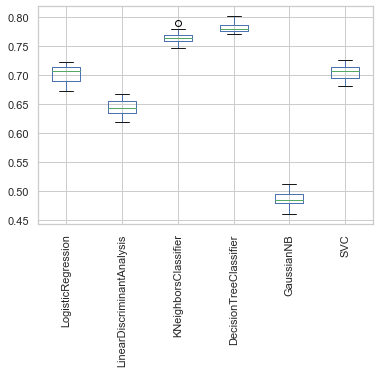

In [583]:
pd.DataFrame(results).plot(kind = 'box',rot = 90);
#plt.savefig('C:\\Users\Joshu\OneDrive\Desktop\AFS\project2\covtype.ML_results.png')

**7p.** Write which algorithm you feel performed the best and explain (3 pts).

The decision tree clasifier and the k neighbors were the two best performing models. To choose 1 model I have decided that the decision tree model is better suited to predict the classification since our outcome is in classes.

KNN does not build classification models and learns from training observations.

### 7.4 Make Predictions!

**7q.** Using the algorithm that performs the best, use it to make a prediction using the `Xv` validation we set aside earlier (4 pts).

In [584]:
alg = DecisionTreeClassifier()

# Call the .fit() function on the string "alg" which is the algorithim that preforms the Decision Tree Classifier model.
# The fit function build's a decision tree classifier from the training set (Xt, yt).
alg.fit(Xt, Yt)

# Call the .predict() function on the string "alg" which predict's a class (we are predicting a class) or regression value for X.
# We then pass through our Xv testing data and the function makes 2800 predictions and assigns the outcome to the string "predictions".
predictions = alg.predict(Xv)
predictions

array(['Cottonwood/Willow', 'Aspen', 'Krummholz', ..., 'Ponderosa Pine',
       'Douglas-fir', 'Aspen'], dtype=object)

**7r**.  Show the accuracy score of the prediction (4 pts).

In [585]:
# The function accuracy_score() takes the Yv testing data, and the predictions from the Xv testing data 
# which must be the same size and it returns the accuracy score of the predictions. Max score is 1.
# This function returns the overall accuracy of predicting cover type correctly. 69% accurate which is decent.
accuracy_score(Yv, predictions)

0.7896428571428571

**7s** Show the confusion matrix.  Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

(7.0, 0.0)

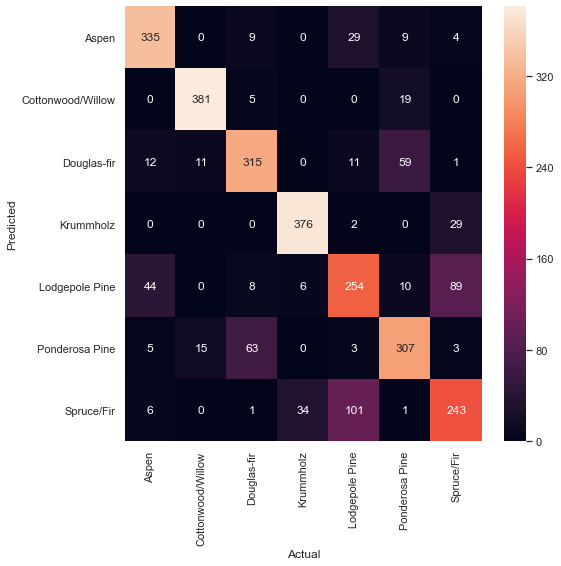

In [586]:
label = ML['Cover_Type'].unique()
cm = confusion_matrix(Yv, predictions, labels = label)

plt.figure(figsize=(8,8));
ax = sns.heatmap(cm, annot = True, xticklabels = label, yticklabels = label, fmt='', annot_kws={"size": 12});

plt.ylabel('Predicted')
plt.xlabel('Actual')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**7t.** Print the classifcation report. Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [371]:
cr = classification_report(Yv, predictions)
print(cr)

                   precision    recall  f1-score   support

            Aspen       0.84      0.88      0.86       386
Cottonwood/Willow       0.92      0.93      0.93       405
      Douglas-fir       0.79      0.78      0.78       409
        Krummholz       0.92      0.93      0.92       407
   Lodgepole Pine       0.63      0.56      0.59       411
   Ponderosa Pine       0.77      0.77      0.77       396
       Spruce/Fir       0.62      0.66      0.64       386

         accuracy                           0.79      2800
        macro avg       0.78      0.79      0.78      2800
     weighted avg       0.78      0.79      0.78      2800



## 8. Summarize/Classification Report 

**8a**.  Explain in your own words the meaning of the results in last three cells of Section 7. How well did the algorithm perform? (3 pts).

##### Precision (Column 1):
Is the ratio of tp / (tp + fp). Precision is the percentage of positive predictions divided by the total amount of positives predicted, calculated with a ratio. When Aspen is the predicted cover type and it is accurate with 84% out of the total amount of predictions the model makes.

##### Recall (Column 2): 
Is the ratio of - true poisitives / (true positives / false negatives). Recall aka Sensitivity aka True positive rate tells us the percentage of correct positive predictions when a positive is predicted. When Cottonwood/Willow is the predicted cover type is 93% accurate out of the total amount of positives predicted.

#####  Accuracy
Accuracy is total number of correct predictions / total number of predictions. More precisly, it is :
TP + TN / (TP + TN + FB + FN).

##### F1
F1 a metric that is used to compare classifier models and is not appropriate for predicting global acuracy. The score uses the harmonic mean of precision and recall and punishes the extreme values and returns a balanced classification which is a combination of precision and recall, which for that reason tends to have a lower score then accuracy.

##### Support
Support is the number of true instances for each class of the outcome variable Y.

##### Marco avrg
Macro avrg is a function for computing f1 that uses the unweighted mean for each column.

##### Weighted avrg
Weighted avrg is a function for computing f1 that uses the average weight by support which is calculated for each column. Weighted takes into account support.

##### Confusion Matrix
Confusion Matrix (7s):
When the heat map/confusion matrix is a darker shade, it represents a low value and when there is a lighter shade it represents an larger value. The values take the form of a number greater or equal to 0 which represent true predictions for the outcome variable, cover type. The bottom left corner of the matrix there is a square with a value of 6 that represents the number of times Spuce/Fir was incorrectly predicted and Aspen was the actual (or true) cover type. The square in the bottom right corner which is a part of the right-to-left diagonal that means it was correctly predicted. In this case Spuce/Fir was predicted correctly 243 times.

##### Fit and predict
Fit and predict (7r):
Call the .fit() function on the string "alg" which is the algorithim that preforms the Decision Tree Classifier model. The fit function build's a decision tree classifier from the training set (Xt, yt).

##### alg.fit(Xt, Yt)

Call the .predict() function on the string "alg" which predicts a class (we are predicting a class) or regression value for X. We then pass through our Xv testing data and the function makes 2800 predictions and assigns the outcome to the string "predictions".

predictions = alg.predict(Xv)
predictions

##### accuracy_score(Yv, predictions)
The function accuracy_score() takes the Yv testing data, and the predictions from the Xv testing data which must be the same size and it returns the accuracy score of the predictions. Max score is 1. This function returns the overall accuracy of predicting cover type correctly. 78% accurate which is relatively good compared to the other models.

**8b.** Write if there anything you would do differently to try to improve the quality of the prediction (3 pts).

To improve the quality of the prediction I would do research on forestry to have a better understanding on which variables have predictive power in reality. There is also many different ways to tweak the machine learning models we have used. Utilizing these correctly would increase the quality of the predictions but I emphasize the word "correctly" because incorrect prediction could lead to type II errors.